In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Importing Data From Text File

In [2]:
dataList = [];
with open('exp2.txt') as f: ##reads each line into different entry of list
    for line in f:
        dataList.append(np.array(line.split()));

dataList = dataList[2:] ## Removes first 2 elements which are titles.

for i in range(len(dataList)): ##Parses data to float from string
    dataList[i] = dataList[i].astype('float')

dataList = np.array(dataList) ##numpy array better

### Cool Customization and Stuff

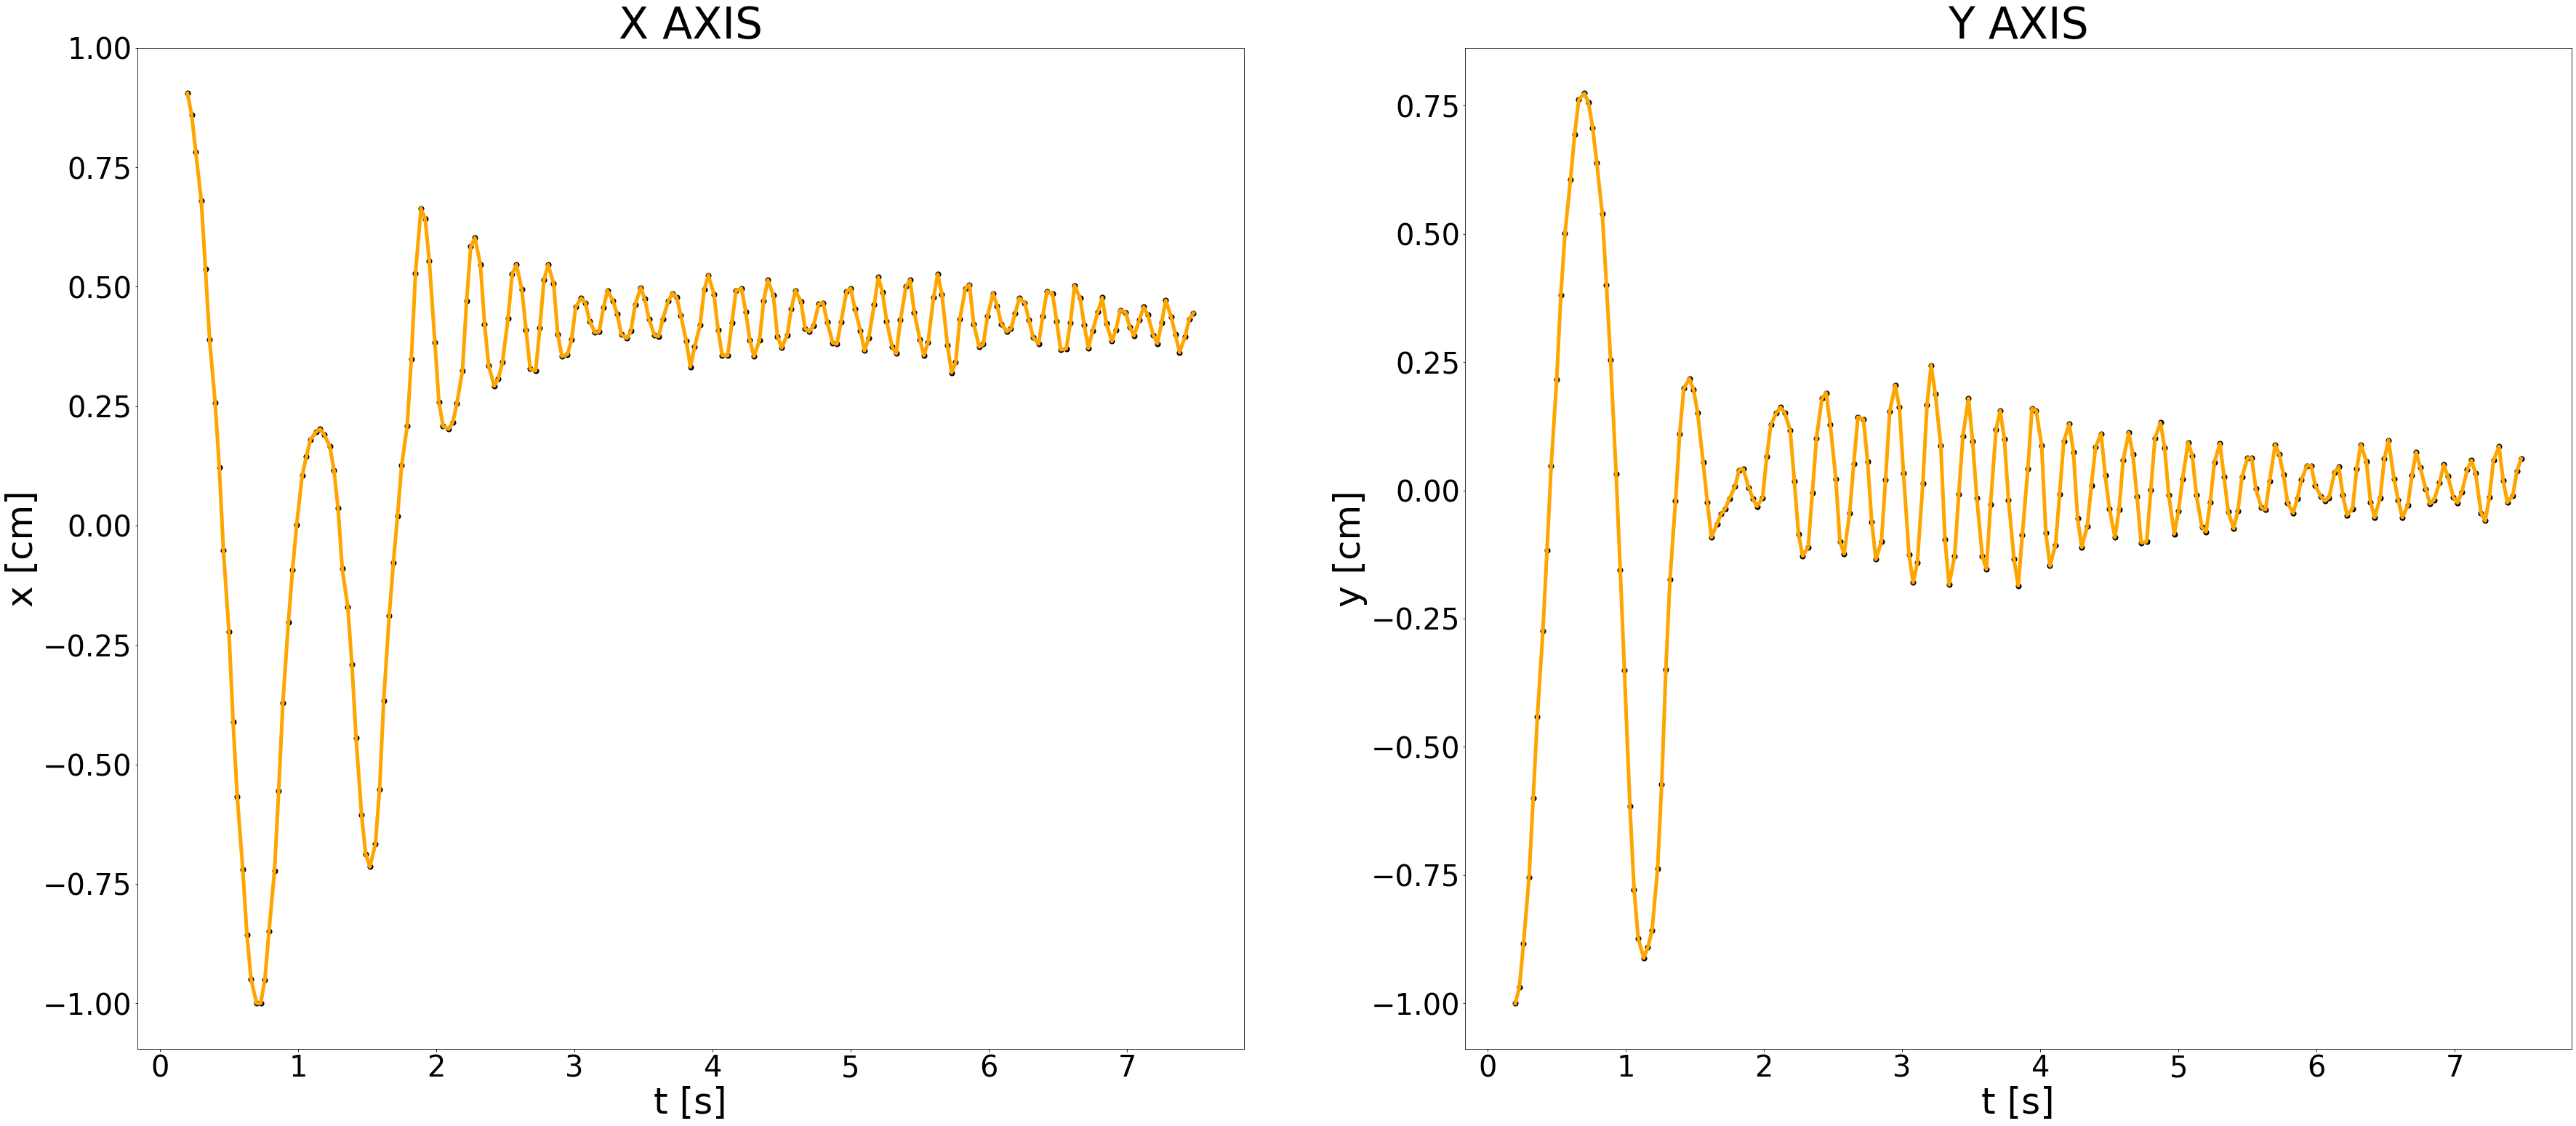

In [3]:
fig, ax = plt.subplots(1,2, figsize = (60,15))

plt.subplots_adjust(top = 1.4);

axfont = 50
titlefont = 60
linewidth = 5

s = 50
linewidth = 5

#fig.set_facecolor('blue') ##Set patch color of entire figure
fig.set_facecolor('white')
ax[0].set_title('X AXIS', fontsize = titlefont);
ax[0].set_xlabel('t [s]', fontsize = axfont);
ax[0].set_ylabel('x [cm]', fontsize = axfont);
ax[0].set_facecolor('white')
ax[0].tick_params(axis = "x", labelsize = 40)
ax[0].tick_params(axis = "y", labelsize = 40)

ax[1].set_title('Y AXIS', fontsize = titlefont);
ax[1].set_xlabel('t [s]', fontsize = axfont);
ax[1].set_ylabel('y [cm]', fontsize = axfont);
ax[1].set_facecolor('white')
ax[1].tick_params(axis = "x", labelsize = 40)
ax[1].tick_params(axis = "y", labelsize = 40)

ax[0].scatter(dataList[:,0], dataList[:,1]/max(np.abs(dataList[:,1])), s=s, color = "black")
ax[0].plot(dataList[:,0], dataList[:,1]/max(np.abs(dataList[:,1])), color="orange", linewidth=linewidth)

ax[1].scatter(dataList[:,0], dataList[:,2]/max(np.abs(dataList[:,2])), s=s, color = "black")
ax[1].plot(dataList[:,0], dataList[:,2]/max(np.abs(dataList[:,2])), color="orange", linewidth=linewidth)

### Simulation

In [4]:
from scipy.integrate import odeint

In [5]:
#Parameters
n = 3;
R = 1;
a = 9.8;
b = 0.1;
h = 0.5;
zeta = 5;

In [24]:
n = 4
R = 0.063
L = 0.16
m = 0.04
a = 9.8
b = 0.47
h = 0.035
zeta = 3*1.7*1.7*10**(-7)

In [20]:
def odefunc(U,t):
    x,y,dx,dy = U;
    s1 = 0;
    s2 = 0;
    for i in range(n):
        di5 = ((R*np.cos(2*np.pi*(i+1)/n) - x)**2+(R*np.sin(2*np.pi*(i+1)/n) - y)**2 + h**2)**(5/2);

        s1 += zeta * (R*np.cos(2*np.pi*(i+1)/n) - x) / di5;
        s2 += zeta * (R*np.sin(2*np.pi*(i+1)/n) - y) / di5;

    return [dx, dy, -a*x-b*dx+s1, -a*y-b*dy+s2]

In [21]:
t = np.linspace(0,20,296);
U0 = [0.3, 0.4,0,0];
sol = odeint(odefunc, U0, t)

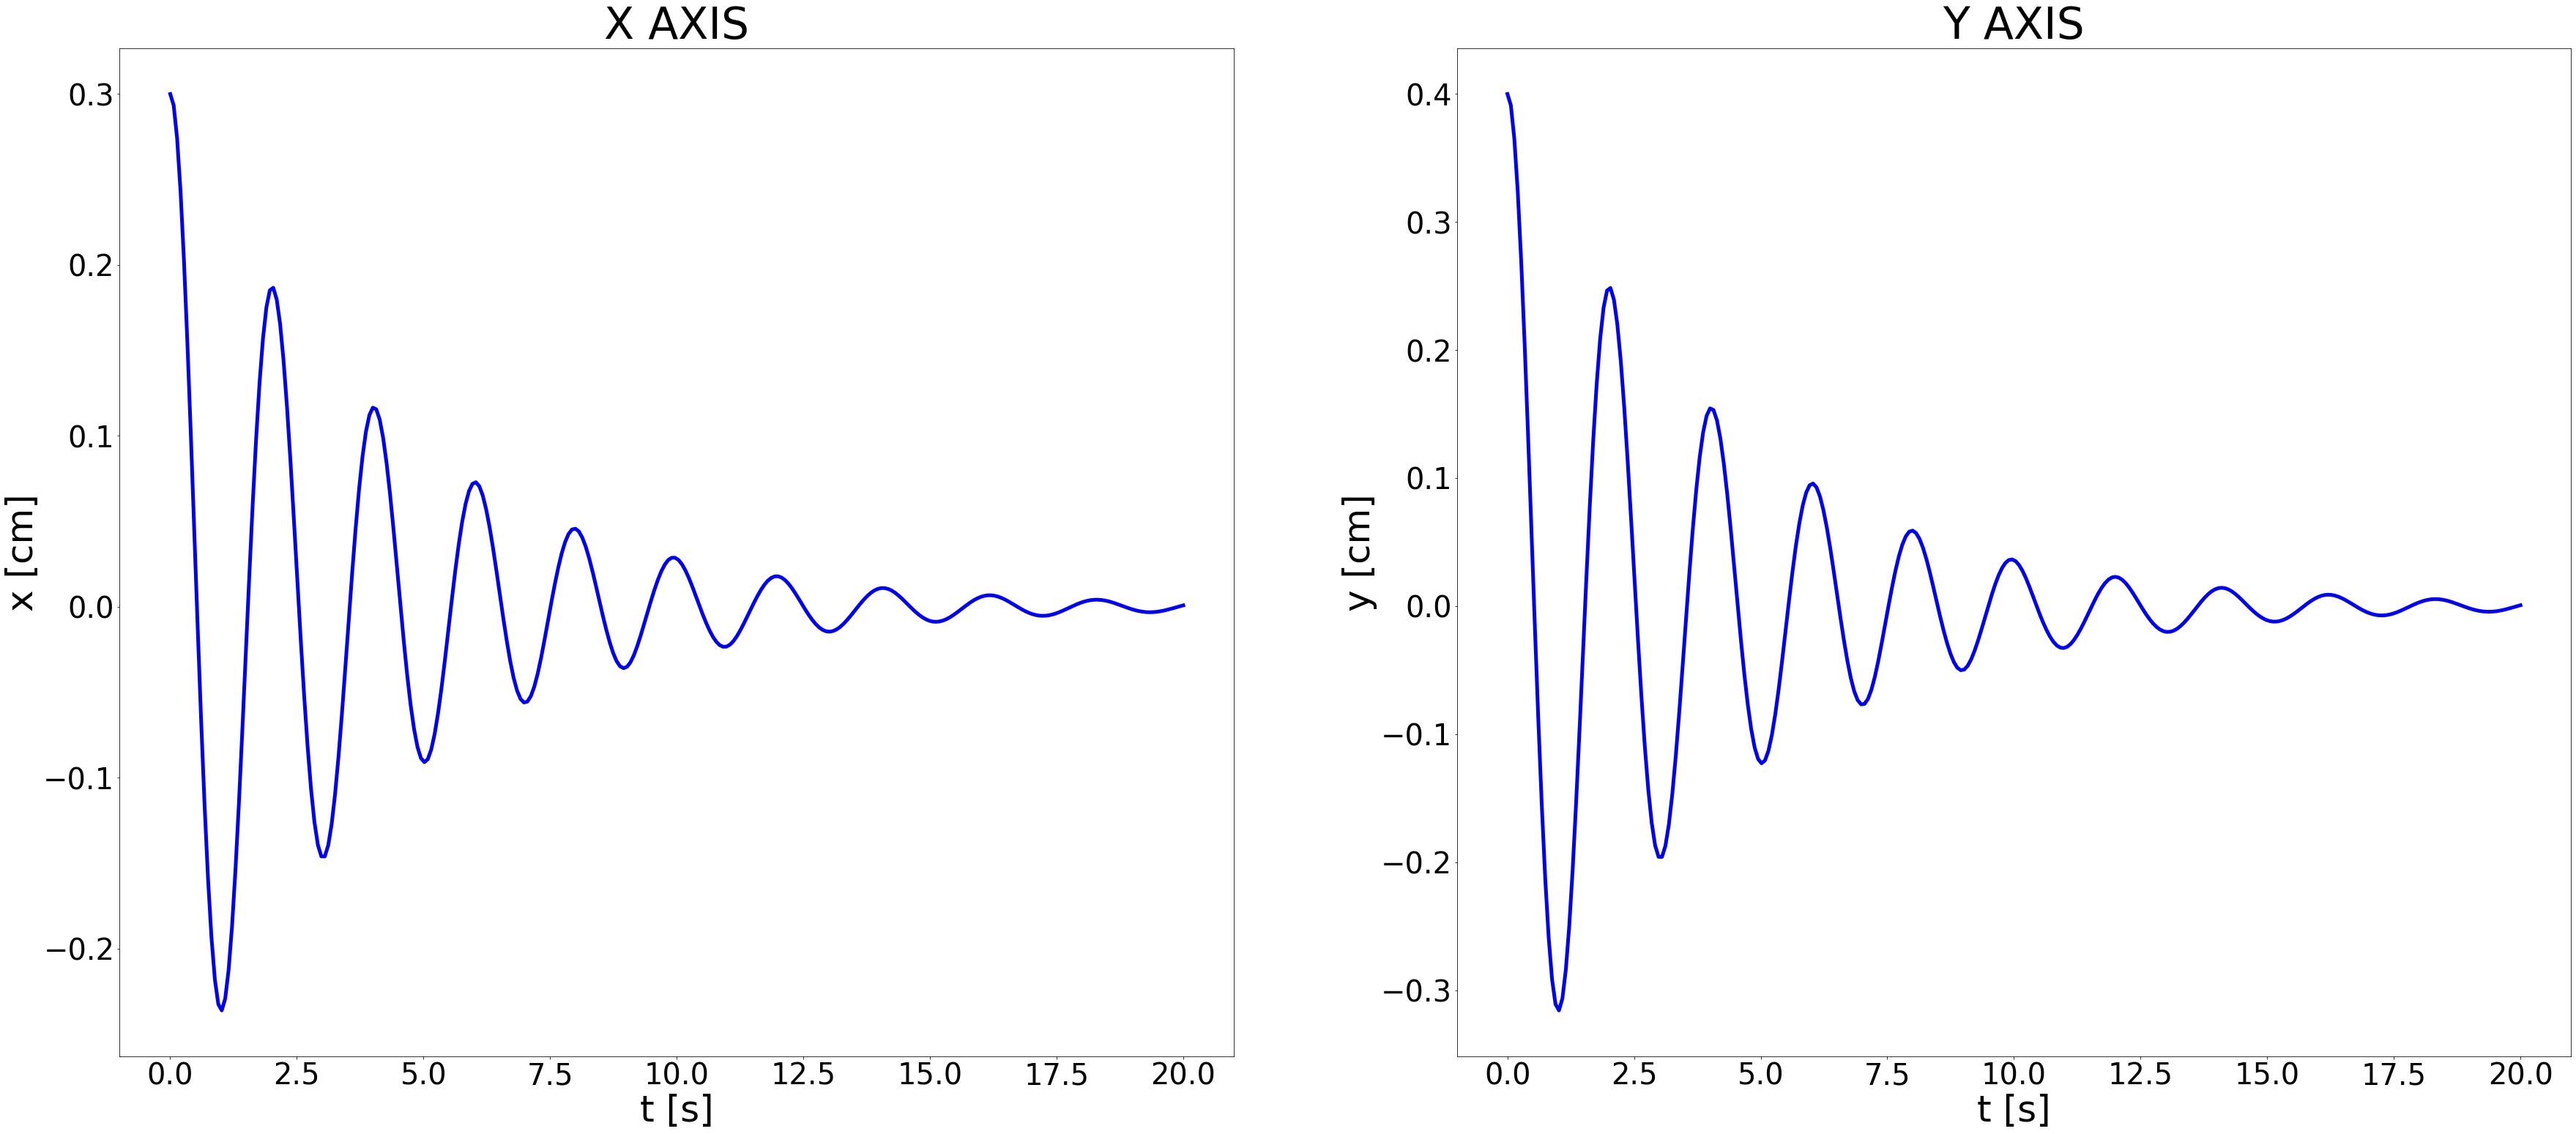

In [22]:
fig, ax = plt.subplots(1,2, figsize = (60,15))

plt.subplots_adjust(top = 1.4);

axfont = 50
titlefont = 60
linewidth = 5

#fig.set_facecolor('blue') ##Set patch color of entire figure
fig.set_facecolor('white')
ax[0].set_title('X AXIS', fontsize = titlefont);
ax[0].set_xlabel('t [s]', fontsize = axfont);
ax[0].set_ylabel('x [cm]', fontsize = axfont);
ax[0].set_facecolor('white')
ax[0].tick_params(axis = "x", labelsize = 40)
ax[0].tick_params(axis = "y", labelsize = 40)

ax[1].set_title('Y AXIS', fontsize = titlefont);
ax[1].set_xlabel('t [s]', fontsize = axfont);
ax[1].set_ylabel('y [cm]', fontsize = axfont);
ax[1].set_facecolor('white')
ax[1].tick_params(axis = "x", labelsize = 40)
ax[1].tick_params(axis = "y", labelsize = 40)

#ax[0].scatter(t, sol[:,0], s=6, color = "gold")
ax[0].plot(t, sol[:,0], color="blue", linewidth = linewidth)

#ax[1].scatter(t, sol[:,1], s=6, color = "gold")
ax[1].plot(t, sol[:,1], color="blue", linewidth = linewidth)

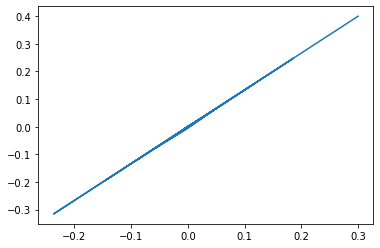

In [23]:
plt.plot(sol[:,0], sol[:,1])

In [11]:
#Writing data to text file
file = open('Sim Data.txt', 'w');
for data in sol:
    file.write('\n');
    file.write(str(data) +'\n')

In [13]:
sol[:,0][-1]

-0.6740507634226321